<a href="https://colab.research.google.com/github/BaharehAm/Python-tutorials-for-Advanced-Data-Mining/blob/main/Tutorial_2_Supervised_%26_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning example: Diabetes classification problem

This classification problem is a supervised machine learning problem with a binary outcome. A simple classification methods namely K-Nearest Neighbor (KNN) is trained on the given dataset to predict if an individual is likely to be a diabetic patient or not.

## Importing the Libraries and Loading the Dataset

In [ ]:
## Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from google.colab import files


In [ ]:
%%capture
pip install transformers

In [ ]:
## Load the dataset and create a dataframe
data_to_load = files.upload()
df = pd.read_csv('diabetes.csv')
df.head(10)

Saving diabetes.csv to diabetes (1).csv


,Pregnancies,Glucose,Pressure,Insulin,BMI,DPF,Age,Social smoker,Social drinker,Outcome
0,0,86,68,0,35.8,0.238,25,1,0,0
1,0,161,50,0,21.9,0.254,65,0,1,0
2,0,121,66,165,34.3,0.203,33,0,0,1
3,0,117,80,53,45.2,0.089,24,1,1,0
4,0,162,76,100,53.2,0.759,25,1,1,1
5,0,124,70,0,27.4,0.254,36,0,0,1
6,0,93,60,92,28.7,0.532,22,1,1,0
7,0,91,80,0,32.4,0.601,27,0,1,0
8,0,152,82,272,41.5,0.270,27,0,1,0
9,0,109,88,0,32.5,0.855,38,0,0,1


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TA/691 - Winter 23/diabetes.csv')
df.tail(3)

,Pregnancies,Glucose,Pressure,Insulin,BMI,DPF,Age,Social smoker,Social drinker,Outcome
497,14,100,78,184,36.6,0.412,46,0,1,1
498,14,175,62,0,33.6,0.212,38,0,0,1
499,15,136,70,110,37.1,0.153,43,1,1,1


In [ ]:
import os
os.chdir('/content/drive/MyDrive/TA/691 - Winter 23')

In [ ]:
df = pd.read_csv('diabetes.csv')
df
df.drop(columns=['BMI', 'Age'], inplace = True)

In [ ]:
df.to_csv('diabetes_drop.csv')

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,Pressure,Insulin,BMI,DPF,Age,Social smoker,Social drinker,Outcome
0,0,86,68,0,35.8,0.238,25,1,0,0
1,0,161,50,0,21.9,0.254,65,0,1,0
2,0,121,66,165,34.3,0.203,33,0,0,1
3,0,117,80,53,45.2,0.089,24,1,1,0
4,0,162,76,100,53.2,0.759,25,1,1,1
...,...,...,...,...,...,...,...,...,...,...
495,13,152,90,29,26.8,0.731,43,1,0,1
496,13,104,72,0,31.2,0.465,38,1,0,1
497,14,100,78,184,36.6,0.412,46,0,1,1
498,14,175,62,0,33.6,0.212,38,0,0,1


## Data exploration

In [ ]:
## Get some information about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     500 non-null    int64  
 1   Glucose         500 non-null    int64  
 2   Pressure        500 non-null    int64  
 3   Insulin         500 non-null    int64  
 4   BMI             500 non-null    float64
 5   DPF             500 non-null    float64
 6   Age             500 non-null    int64  
 7   Social smoker   500 non-null    int64  
 8   Social drinker  500 non-null    int64  
 9   Outcome         500 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 39.2 KB


In [ ]:
## Check for null and missing values
df.isnull().values.any()
df.isnull().sum()

Pregnancies       0
Glucose           0
Pressure          0
Insulin           0
BMI               0
DPF               0
Age               0
Social smoker     0
Social drinker    0
Outcome           0
dtype: int64

In [ ]:
## Check for statistical details
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.794000,3.340941,0.000,1.0000,3.0000,6.000,15.000
Glucose,500.0,119.094000,28.666788,33.000,99.0000,114.0000,137.000,189.000
Pressure,500.0,72.392000,12.378076,24.000,64.0000,72.0000,80.000,122.000
Insulin,500.0,86.692000,116.681405,0.000,0.0000,53.0000,135.000,846.000
BMI,500.0,31.971600,6.980559,0.000,27.4000,32.0000,35.925,53.200
DPF,500.0,0.469446,0.326820,0.084,0.2445,0.3725,0.616,2.288
Age,500.0,33.206000,11.772542,21.000,24.0000,29.0000,41.000,81.000
Social smoker,500.0,0.488000,0.500357,0.000,0.0000,0.0000,1.000,1.000
Social drinker,500.0,0.514000,0.500305,0.000,0.0000,1.0000,1.000,1.000
Outcome,500.0,0.332000,0.471403,0.000,0.0000,0.0000,1.000,1.000


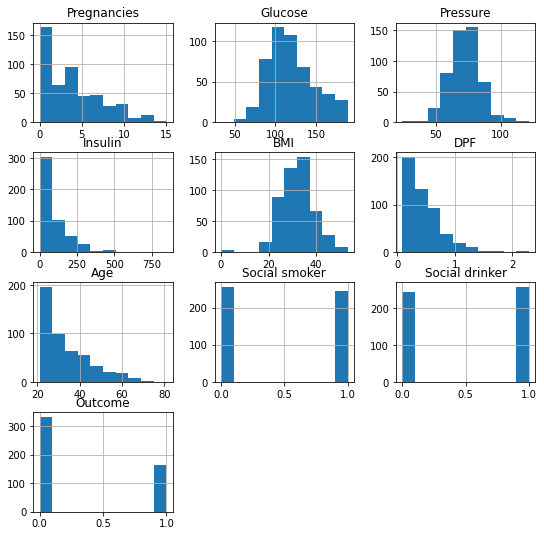

In [ ]:
## check for histograms
df.hist(bins=10,figsize=(9,9))
plt.show()

Based on the information we received from `df.info()`, it seems that there is not any null values in the dataset, but the minimum value of 0 for "BMI" and "Insulin" ( observed in both `df.describe()` and **histograms** ) is meaningless and it might indicate the presence of missing values in these two columns. We need to replace those zeros with NaN and then replacing the NaN's with the "BMI" and "Insulin" mean values. The reason for doing this is to remove the effect of zeros in mean calculations.
It should be noted that we can replace the zeros with a random sampling number or even median values. Also, we do not remove the rows with missing values as it decrease the size of dataset significantly.

In [ ]:
np.NAN

nan

In [ ]:
## Replace the zeros with "NaN"
df[["BMI"]]=df[["BMI"]].replace(0,np.NaN)
df[["Insulin"]]=df[["Insulin"]].replace(0,np.NaN)

In [ ]:
df.isnull().sum()

Pregnancies         0
Glucose             0
Pressure            0
Insulin           221
BMI                 3
DPF                 0
Age                 0
Social smoker       0
Social drinker      0
Outcome             0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.794000,3.340941,0.000,1.0000,3.0000,6.000,15.000
Glucose,500.0,119.094000,28.666788,33.000,99.0000,114.0000,137.000,189.000
Pressure,500.0,72.392000,12.378076,24.000,64.0000,72.0000,80.000,122.000
Insulin,279.0,155.362007,117.177392,18.000,76.0000,125.0000,193.000,846.000
BMI,497.0,32.164588,6.542405,18.200,27.5000,32.0000,36.000,53.200
DPF,500.0,0.469446,0.326820,0.084,0.2445,0.3725,0.616,2.288
Age,500.0,33.206000,11.772542,21.000,24.0000,29.0000,41.000,81.000
Social smoker,500.0,0.488000,0.500357,0.000,0.0000,0.0000,1.000,1.000
Social drinker,500.0,0.514000,0.500305,0.000,0.0000,1.0000,1.000,1.000
Outcome,500.0,0.332000,0.471403,0.000,0.0000,0.0000,1.000,1.000


In [ ]:
df['BMI'].mean()

32.16458752515091

In [ ]:
## Replace the "NaN" values with the mean
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Pregnancies       0
Glucose           0
Pressure          0
Insulin           0
BMI               0
DPF               0
Age               0
Social smoker     0
Social drinker    0
Outcome           0
dtype: int64

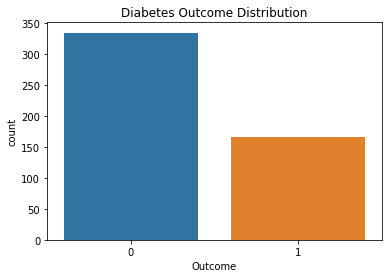

There are a total of 500 observations in this dataset
The number of True outcomes is 166 which is 33.20 percent of the totoal observations
The number of False outcomes is 334 which is 66.8 percent of the totoal observations


In [ ]:
## Check for target variable distribution (i.e., the 'Output' column)
sns.countplot(x = df['Outcome'],label="Count")
plt.title('Diabetes Outcome Distribution')
plt.show()

print("There are a total of %s observations in this dataset" %(len(df)))
print("The number of True outcomes is %s which is %.2f percent of the totoal observations"
      %(len(df.loc[df['Outcome']==1]),(len(df.loc[df['Outcome']==1]) / len(df)) * 100))
print("The number of False outcomes is %s which is %.1f percent of the totoal observations"
      %(len(df.loc[df['Outcome']==0]),(len(df.loc[df['Outcome']==0]) / len(df)) * 100))

In [ ]:
df.corr()

,Pregnancies,Glucose,Pressure,Insulin,BMI,DPF,Age,Social smoker,Social drinker,Outcome
Pregnancies,1.000000,0.105033,0.205873,0.060131,0.059471,-0.014377,0.563284,-0.009274,0.001129,0.276370
Glucose,0.105033,1.000000,0.165434,0.455071,0.214106,0.094058,0.230627,-0.000410,0.002214,0.470453
Pressure,0.205873,0.165434,1.000000,0.051123,0.266075,-0.028664,0.337642,0.028264,0.028236,0.174788
Insulin,0.060131,0.455071,0.051123,1.000000,0.186674,0.097292,0.146087,-0.031671,-0.021793,0.245667
BMI,0.059471,0.214106,0.266075,0.186674,1.000000,0.100596,0.062614,0.103363,0.058748,0.275415
DPF,-0.014377,0.094058,-0.028664,0.097292,0.100596,1.000000,0.047828,-0.014201,-0.021150,0.203738
Age,0.563284,0.230627,0.337642,0.146087,0.062614,0.047828,1.000000,0.011818,-0.052719,0.266066
Social smoker,-0.009274,-0.000410,0.028264,-0.031671,0.103363,-0.014201,0.011818,1.000000,-0.011336,0.059406
Social drinker,0.001129,0.002214,0.028236,-0.021793,0.058748,-0.021150,-0.052719,-0.011336,1.000000,-0.019747
Outcome,0.276370,0.470453,0.174788,0.245667,0.275415,0.203738,0.266066,0.059406,-0.019747,1.000000


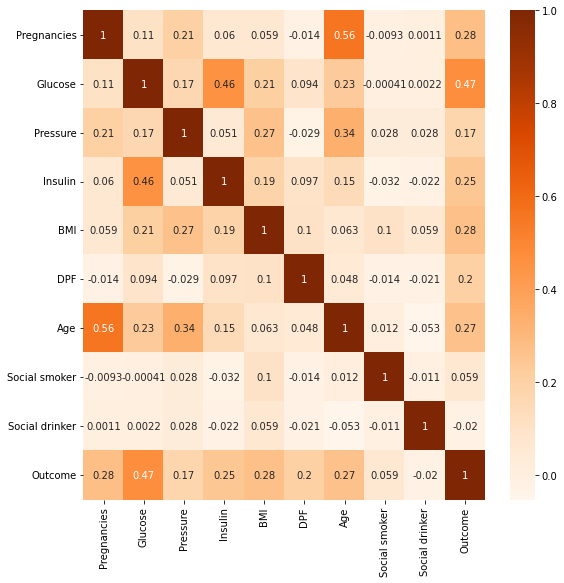

In [ ]:
## Check for correlations
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(), cmap='Oranges', annot=True, square=False, ax=ax)
plt.show()

It seems that the features do not have strong correlation with each other and multicollinearity is not an issue in this dataset.

## Data splitting

We need to normalize the dataset since we have features with different scales and units of measures. Here, we use StandardScaler function where all features with **numeric** values are standardized so that each feature will have the mean value of μ = 0 and a standard deviation of σ = 1.


In [ ]:
## Normalize the numeric features
SC = StandardScaler()
X_to_be_SC = df.drop(['Outcome','Social smoker','Social drinker'], axis=1)
X_CS = SC.fit_transform(X_to_be_SC)
X_CS
X_to_be_SC.columns
X_SC = pd.DataFrame(X_CS, columns=X_to_be_SC.columns)
X_SC.head()

,Pregnancies,Glucose,Pressure,Insulin,BMI,DPF,Age
0,-1.136745,-1.155593,-0.355176,0.000000,0.557905,-0.708885,-0.697744
1,-1.136745,1.463295,-1.810817,0.000000,-1.575246,-0.659880,2.703396
2,-1.136745,0.066555,-0.516914,0.110308,0.327709,-0.816085,-0.017516
3,-1.136745,-0.073119,0.615251,-1.171541,2.000468,-1.165251,-0.782772
4,-1.136745,1.498214,0.291775,-0.633623,3.228180,0.886862,-0.697744


In [ ]:
df[['Social smoker','Social drinker']]

,Social smoker,Social drinker
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1
...,...,...
495,1,0
496,1,0
497,0,1
498,0,0


In [ ]:
## Specify the feature and target datasets [X and y]
X = pd.concat([X_SC, df[['Social smoker','Social drinker']] ], axis=1 )
y = df[['Outcome']]

In [ ]:
## Split the dataset into training, validation, and test sets  (50,30,20 ratios)

random_state=32  # This is to make sure that each time we run the code, the same data points are asssigned to the sub-sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3/0.8, random_state=random_state, stratify=y_train)
# The reason that we set a value for "stratify" parameter is to have the same proportion of outcomes in training, validation, and test sets.

print("The size of Training set is: %s (%.f percent of total) " %(len(X_train),len(X_train)/len(df)*100))
print("The size of Validation set is: %s (%.f percent of total) " %(len(X_valid),len(X_valid)/len(df)*100))
print("The size of Test set is: %s (%.f percent of total) " %(len(X_test),len(X_test)/len(df)*100))


The size of Training set is: 250 (50 percent of total) 
The size of Validation set is: 150 (30 percent of total) 
The size of Test set is: 100 (20 percent of total) 


## Modeling: Validation and Evaluation

**K-Nearest Neighbour** [Reference](https://medium.com/analytics-vidhya/diabetes-classification-with-knn-and-logistic-regression-2edd3760a8c7)

K-Nearest is a Distance based Algorithm which means it does take distance in consideration when learning a data set, K-Nearest tries to classify which data point belongs to which class, let’s say we have a finite number of data points on a graph from these finite number data points we have five data points near to each other which implies they have a-lot in common so hypothetically it’s safe to consider them a class and this what K-nearest tries to achieve to classify points to a class by clustering points similar to each other as a class.

**What is K (**`n_neighbors` in the code**)?**
K is a variable and it changes depending on the problem but the most common value for k is between 5 and 10, what K represents is the number of data points we take in consideration when forming a class or classifying a data point for example if you chose the K to be 2 or 3 then the point you’re trying to classify will look to the nearest 2 or 3 points and what class do they belong to and it will be classified to the class with the shortest distance.

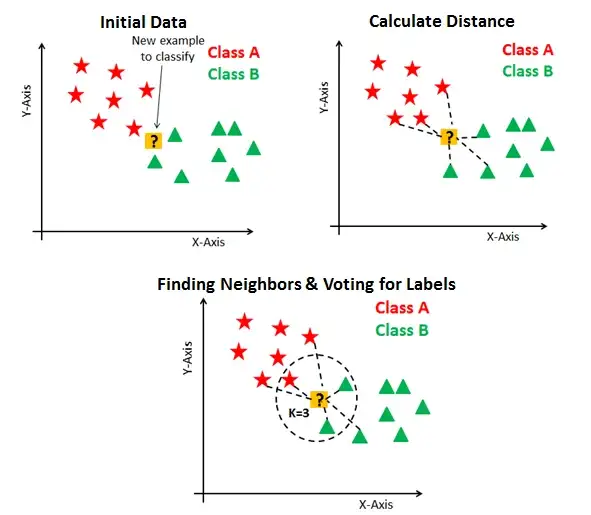

In [ ]:
## Hyper-parameter tuning

n_neighbors_set = range(1,20)

Valid_Acc_list = []
for n_neighbors in n_neighbors_set:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_train,np.ravel(y_train))
    Valid_Acc_list.append(model.score(X_valid,y_valid))

best_param = n_neighbors_set[np.argmax(Valid_Acc_list)]
best_valid_acc = max(Valid_Acc_list)

print(best_param , round(best_valid_acc,5))

19 0.75333


**Performance metrics**

Accuracy is not a good measure of classification performance especially when it comes to having an unbalanced dataset which is in this case. In medical diagnostics, both sensitivity and specificity must be taken into account in order to determine the best diagnostic test.
The former is a measure of how well a test can identify sick people and the latter measures how well a test can identify healthy people.
The Confusion matrix, sensitivity, and specificity are defined as below:

|               |  |Predicted Label   |                   |
|---------------|--|------------------|-------------------|
|               |  |         1        |          0        |
|**True Label** |1 |  True Positive   |  False Negative   |
|               |0 |  False Positive  |  True Negative    |

* **True Positive - TP:** diabetic patients correctly identified as diabetic patients
* **False Positive - FP:** Healthy people incorrectly identified as diabetic patients
* **True Negative - TN:** Healthy people correctly identified as healthy
* **False Negative - FN:** diabetic patients incorrectly identified as healthy
* **Specificity** or true negative rate  **TNR = TN / (TN+FP)** **-->** The number of people who are correctly diagnosed as healthy over the total number of healthy people
* **Sensitivity (or Recall)** or true positive rate  **TPR = TP / (TP+FN)** **-->** The number of people who are correctly diagnosed as diabetic patients over the total number of diabetic patients
* **Precision = TP / (FP+TP)**  **-->** The number of people who are correctly identified as diabetic patients over the total number of positive predictions
* **Accuracy = TN + TP / (TN+FP+TP+FN)**
* **F1 score = 2 x (Precision x Recall / Precision + Recall)** **-->** It is the harmonic mean of precision and recall and is a better measure than accuracy

In [ ]:
## initialize the validated model
model = KNeighborsClassifier(n_neighbors = best_param)

## Re-train the validated model on the training set
model.fit(X_train, y_train.values.ravel())

## Evaluate the model on test set
y_pred = model.predict(X_test)

test_accuracy = model.score(X_test,y_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

TP = confusion_matrix(y_test, y_pred)[0, 0]
FP = confusion_matrix(y_test, y_pred)[1, 0]
TN = confusion_matrix(y_test, y_pred)[1, 1]
FN = confusion_matrix(y_test, y_pred)[0, 1]
# print(TP, FP, TN, FN)
Result = [type(model).__name__, best_param, best_valid_acc, test_accuracy, TP/(TP+FN), TN/(TN+FP), TP/(FP+TP), 2 * ((TP/(FP+TP)) *  (TP/(TP+FN)) / ( TP/(FP+TP) + TP/(TP+FN) ))]
Results = []
Results.append(Result)
Results = pd.DataFrame(Results, columns=['Model', 'Hyper-parameters', 'Validation Accuracy', 'Test Accuracy', 'Sensitivity(Recall)', 'Specificity', 'Precision', 'F1-Score'])
Results

[[63  4]
 [12 21]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        67
           1       0.84      0.64      0.72        33

    accuracy                           0.84       100
   macro avg       0.84      0.79      0.81       100
weighted avg       0.84      0.84      0.83       100



,Model,Hyper-parameters,Validation Accuracy,Test Accuracy,Sensitivity(Recall),Specificity,Precision,F1-Score
0,KNeighborsClassifier,19,0.753333,0.84,0.940299,0.636364,0.84,0.887324


# Unsupervised Learning example: K-means Clustering for the diabetes dataset


**Clustering** is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. **K-Means clustering** intends to partition n objects into k clusters in which each object belongs to the cluster with the nearest mean. This method produces exactly k different clusters of greatest possible distinction. The best number of clusters k leading to the greatest separation (distance) is not known as a priori and must be computed from the data. The objective of K-Means clustering is to minimize objective function, or, the sum of squared error (sse) function:
[Reference](https://medium.com/@cmukesh8688/k-means-clustering-in-machine-learning-252130c85e23)

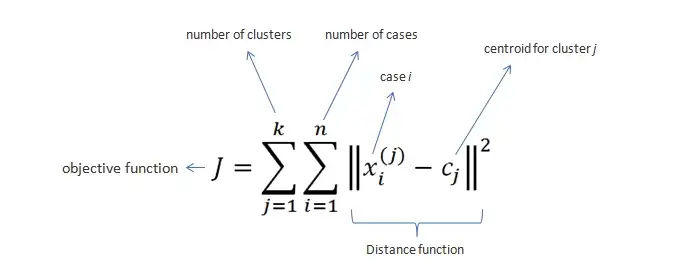

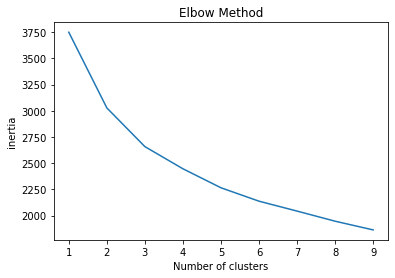

In [ ]:
## "Elbow" Method to find the best value for K (number of clusters)
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
df

,Pregnancies,Glucose,Pressure,Insulin,BMI,DPF,Age,Social smoker,Social drinker,Outcome
0,0,86,68,155.362007,35.8,0.238,25,1,0,0
1,0,161,50,155.362007,21.9,0.254,65,0,1,0
2,0,121,66,165.000000,34.3,0.203,33,0,0,1
3,0,117,80,53.000000,45.2,0.089,24,1,1,0
4,0,162,76,100.000000,53.2,0.759,25,1,1,1
...,...,...,...,...,...,...,...,...,...,...
495,13,152,90,29.000000,26.8,0.731,43,1,0,1
496,13,104,72,155.362007,31.2,0.465,38,1,0,1
497,14,100,78,184.000000,36.6,0.412,46,0,1,1
498,14,175,62,155.362007,33.6,0.212,38,0,0,1


{0, 1}


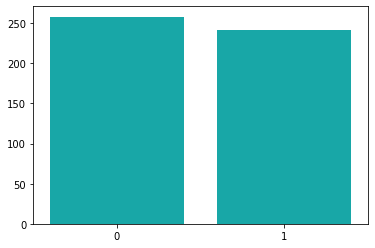

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
df['cluster'] = pred_y
print(set(kmeans.labels_))

cluster_distrib = df['cluster'].value_counts()
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='c')
plt.show()

In [ ]:
df

,Pregnancies,Glucose,Pressure,Insulin,BMI,DPF,Age,Social smoker,Social drinker,Outcome,cluster
0,0,86,68,155.362007,35.8,0.238,25,1,0,0,0
1,0,161,50,155.362007,21.9,0.254,65,0,1,0,1
2,0,121,66,165.000000,34.3,0.203,33,0,0,1,0
3,0,117,80,53.000000,45.2,0.089,24,1,1,0,0
4,0,162,76,100.000000,53.2,0.759,25,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
495,13,152,90,29.000000,26.8,0.731,43,1,0,1,1
496,13,104,72,155.362007,31.2,0.465,38,1,0,1,1
497,14,100,78,184.000000,36.6,0.412,46,0,1,1,1
498,14,175,62,155.362007,33.6,0.212,38,0,0,1,1


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

filtered_label0 = df[df['cluster']==0]
filtered_label1 = df[df['cluster']==1]
# filtered_label2 = df[df['cluster']==2]
# filtered_label3 = df[df['cluster']==3]
# filtered_label4 = df[df['cluster']==4]

In [ ]:
len(X.columns)
range(len(X.columns))
X.columns[3]

'Insulin'

In [ ]:
X.columns
axis_labels = { t:X.columns[t] for t in range(len(X.columns)) }
axis_labels

{0: 'Pregnancies',
 1: 'Glucose',
 2: 'Pressure',
 3: 'Insulin',
 4: 'BMI',
 5: 'DPF',
 6: 'Age',
 7: 'Social smoker',
 8: 'Social drinker'}

Text(0.5, 0, 'Glucose')

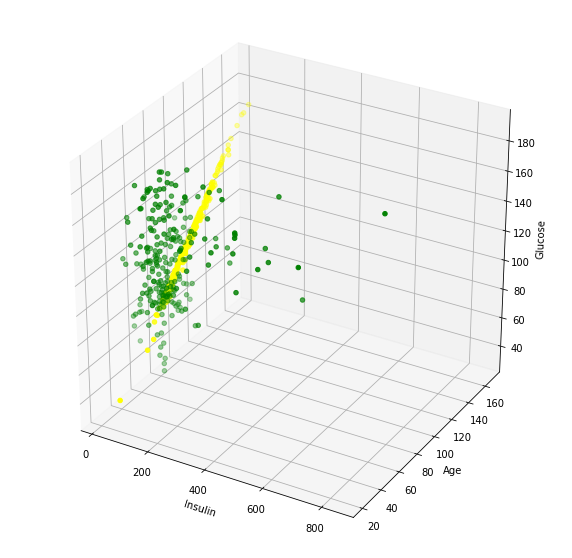

In [ ]:
i = 3    # index of feature as the x axis in scatter plot
j = 6     # index of feature as the y axis in scatter plot
k = 1     # index of feature as the z axis in scatter plot

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# ax.scatter(filtered_label0.iloc[:,i:i+1] , filtered_label0.iloc[:,j:j+1], color = 'yellow')
# ax.scatter(filtered_label1.iloc[:,i:i+1] , filtered_label1.iloc[:,j:j+1], color = 'green')


ax.scatter(filtered_label0.iloc[:,j:j+1] , filtered_label0.iloc[:,k:k+1] , filtered_label0.iloc[:,k:k+1], color = 'yellow')
ax.scatter(filtered_label1.iloc[:,i:i+1] , filtered_label1.iloc[:,j:j+1] , filtered_label1.iloc[:,k:k+1], color = 'green')
# ax.scatter(filtered_label2.iloc[:,i:i+1] , filtered_label2.iloc[:,j:j+1] , filtered_label2.iloc[:,k:k+1], color = 'red')
# ax.scatter(filtered_label3.iloc[:,i:i+1] , filtered_label3.iloc[:,j:j+1] , filtered_label3.iloc[:,k:k+1], color = 'blue')
# ax.scatter(filtered_label4.iloc[:,i:i+1] , filtered_label4.iloc[:,j:j+1] , filtered_label4.iloc[:,k:k+1], color = 'blue')

ax.set_xlabel(axis_labels[i])
ax.set_ylabel(axis_labels[j])
ax.set_zlabel(axis_labels[k])